1) Determine el espacio de configuraciones, en los ejes  (x,x˙) , del movimiento horizontal sin fricción de una masa de  0.2 Kg  atada a un resorte de constante elástica  k=1 N/m .

Se define la funcion que describe las ecuaciones del movimiento

In [11]:
import numpy as np
import scipy.integrate as integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
def dU_dt(U,t,m=0.2,k=1.):
    x,v=U
    return [v, (-k*x)/m]
  

Se definen las condiciones inciales para la posicion y la velocidad dentro del rango establecido de -1 a 1, junto con un tiempo maximo en segundos

In [9]:
x0s=-1+np.random.random(100)*2
v0s=-1+np.random.random(100)*2

tmax=30 #segundos

Se escribe un ciclo en el que se resuelven las ecuaciones diferenciales iterando en cada condicion inicial antes descrita y se grafica el espacio de configuracion elongacion-velocidad con los resultados

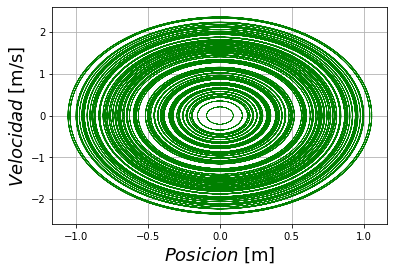

In [13]:
for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,tmax,400)
    U0=[x0,v0]
    Us=integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw = 0.3,color='green')
    
plt.xlabel( "$Posicion$ [m]", fontsize = 18 )
plt.ylabel( "$Velocidad$ [m/s]", fontsize = 18 )
plt.grid()

2) Considere una muestra de Strontium-90,  9838Sr , que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos:

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente.

El decaimiento radiativo está determinado por la formula
N(t)=N0e−λt,λ=ln(2)τ 

N(t)  es el número de núcleos radioactivos que qedan despues de un tiempo  t 
N0  es el número inicial de las partículas presentes (es decir,  t=0 )
λ  es la constante de decaimiento
τ  es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.
(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano  t ,  N(t)  y el correspondiente al fit


In [1]:
import numpy as np
from scipy.optimize import curve_fit
%pylab inline
from google.colab import files    #estas lineas son para poder cargar los archivos 
                                  #de texto ya que trabaje desde Google Colaboratory
uploaded = files.upload()

Populating the interactive namespace from numpy and matplotlib


Saving Datosparcial3.txt to Datosparcial3.txt


In [2]:
t,Nt =np.loadtxt('Datosparcial3.txt', usecols=(0,1), unpack=True)

In [3]:
No=1000

#se define la funcion N(t)
def NT(x,tao):
  return No*np.exp(-np.log(2)*x/tao)

In [4]:
#se realiza el ajuste con curve_fit de scipy

y_ruido = 0.2 * np.random.normal(size=t.size)
y=y_ruido+NT(t,28)   
fit=curve_fit(NT,t,y,bounds=(22,33))  #de 22 a 33 porque viendo los datos, entre esos tiempos se alcanzan los 500 nucleos sin decaer

In [5]:
print('El valor de la vida media sería: %.3f'%fit[0])

El valor de la vida media sería: 27.999


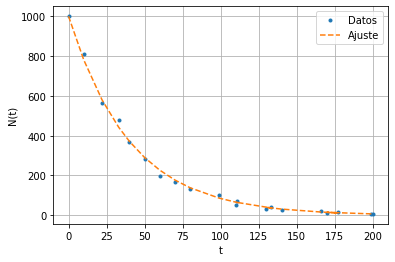

In [7]:
#Grafica

plt.plot(t,Nt,'.',label='Datos')
plt.plot(t,NT(t,fit[0]),'--',label='Ajuste')
plt.legend()
plt.xlabel('t')
plt.ylabel('N(t)')
plt.grid()